## Change the Runtime

As the last lesson, change the runtime type to GPU and install the necessary dependency:
- transformers
- dataset (new!)
- evaluate (new!)

All three library are from the [HuggingFace](https://huggingface.co/) ecosystem. Intuitively the first one is for loading transformer models, the second one is to load and handle data, and the last one is a collection of evaluation metrics we can use to evaluate our models.

In [ ]:
!pip install -U datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; plat

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.3 MB/s eta 0:00:00


## Data Pre-processing

In [ ]:
import datasets

Where to find data on HuggingFace? On the [Dataset](https://huggingface.co/datasets) section. The filters are the same as for the one we saw for the Models, and, same as the model, we load datasets with their handle.



In [ ]:
dataset_name = "mteb/ItaCaseholdClassification"

In [ ]:
dataset = datasets.load_dataset(dataset_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/1.98M [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/238k [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/512k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/792 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/88 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/221 [00:00<?, ? examples/s]

Dataset structure isn't always the same, so it's always best to check it. Good practice should be to provide three splits:
- Training
- Validation
- Test

**Training** should be the largest, and it's used to train the model on the task.  
**Validation** is used to make evaluation on the model during training, and to choose the best moment in training to stop it and load the best-performing model. It can also be used to manually do hyper-paramter tuning.  
**Test** is used to assess the model capabilities. It's a last check of our model performance, we shouldn't aim to make the model performance on the test set as high as possible (e.g. do hyper-paratemer tuning on it) or we run the risk to introduce bias.

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 792
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 88
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 221
    })
})

In [ ]:
labels = set(dataset['train']['label'])

We have tons of different labels

In [ ]:
labels

{'Accesso ai documenti',
 'Aeroporti',
 'Agricoltura',
 'Alimenti',
 'Ambiente',
 'Amministrazione dello Stato',
 'Animali',
 'Annullamento d’ufficio e revoca',
 'Atto amministrativo',
 'Autorità amministrative indipendenti',
 'Autorizzazione amministrativa',
 'Beni culturali',
 'Caccia',
 'Cave',
 'Circolazione stradale',
 'Cittadinanza',
 'Commercio',
 'Concessione amministrativa',
 'Concorrenza',
 'Concorso',
 'Consiglio di Stato e Consiglio di Giustizia per la Regione Siciliana',
 'Contratti della Pubblica amministrazione',
 'Contratti pubblici',
 'Contributi e finanziamenti',
 'Covid-19',
 'Criminalità organizzata',
 'Demanio',
 'Economia',
 'Edilizia',
 'Elezioni',
 'Energia elettrica',
 'Enti locali',
 'Espropriazione per pubblica utilità',
 'Farmaci',
 'Farmacia',
 'Giochi',
 'Giurisdizione',
 'Giustizia amministrativa',
 'Imposte e tasse',
 'Informativa antimafia',
 'Inquinamento',
 'Lavoro',
 'Leggi e decreti',
 'Magistrati',
 'Mare',
 'Militari, forze armate e di polizia',
 

But most of them have a very low support.

In [ ]:
from collections import Counter

counter = Counter(dataset['train']['label'])
counter

Counter({'Procedimento amministrativo': 7,
         'Edilizia': 36,
         'Contratti della Pubblica amministrazione': 102,
         'Giochi': 4,
         'Espropriazione per pubblica utilità': 5,
         'Covid-19': 104,
         'Militari, forze armate e di polizia': 31,
         'Processo amministrativo': 138,
         'Energia elettrica': 9,
         'Alimenti': 4,
         'Autorità amministrative indipendenti': 13,
         'Ambiente': 8,
         'Consiglio di Stato e Consiglio di Giustizia per la Regione Siciliana': 4,
         'Magistrati': 9,
         'Concorrenza': 4,
         'Agricoltura': 5,
         'Pubblica istruzione': 13,
         'Animali': 7,
         'Rifiuti': 5,
         'Beni culturali': 5,
         'Giurisdizione': 25,
         'Società in house': 2,
         'Enti locali': 8,
         'Paesaggio': 6,
         'Concorso': 5,
         'Farmaci': 4,
         'Sport': 5,
         'Elezioni': 5,
         'Sicurezza pubblica': 2,
         'Concessione amministra

So, we remove all the instances of sentences that have a label with low support. In this instance we decide to remove all the labels that appear less than 20 times, leaving us with 8 labels.

In [ ]:
min_occurrence = 20

filtered_counts = {}
for element, count in dict(counter).items():
  if (min_occurrence is None or count >= min_occurrence):
    filtered_counts[element] = count
filtered_counts

{'Edilizia': 36,
 'Contratti della Pubblica amministrazione': 102,
 'Covid-19': 104,
 'Militari, forze armate e di polizia': 31,
 'Processo amministrativo': 138,
 'Giurisdizione': 25,
 'Informativa antimafia': 22,
 'Sanità pubblica': 20}

In [ ]:
labels = list(filtered_counts.keys())
labels

['Edilizia',
 'Contratti della Pubblica amministrazione',
 'Covid-19',
 'Militari, forze armate e di polizia',
 'Processo amministrativo',
 'Giurisdizione',
 'Informativa antimafia',
 'Sanità pubblica']

In [ ]:
def filter_by_label(example):
  return example['label'] in labels

In [ ]:
filtered_dataset = dataset.filter(filter_by_label)

Filter:   0%|          | 0/792 [00:00<?, ? examples/s]

Filter:   0%|          | 0/88 [00:00<?, ? examples/s]

Filter:   0%|          | 0/221 [00:00<?, ? examples/s]

We lose a bit of data in the process, but not too much. It's still a serviceable training set for training a small BERT model.

In [ ]:
print(f"Train before filtering: {len(dataset['train'])}\tTrain after filtering: {len(filtered_dataset['train'])}")
print(f"Eval before filtering: {len(dataset['validation'])}\tEval after filtering: {len(filtered_dataset['validation'])}")
print(f"Test before filtering: {len(dataset['test'])}\tTrain after filtering: {len(filtered_dataset['test'])}")

Train before filtering: 792	Train after filtering: 478
Eval before filtering: 88	Eval after filtering: 52
Test before filtering: 221	Train after filtering: 133


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
model_name = 'dbmdz/bert-base-italian-cased'

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))

tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-italian-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/235k [00:00<?, ?B/s]

We now create a dictionary that help us to translate label "strings" into number, and vice-versa.

In [ ]:
str_to_int = {label: num for num, label in enumerate(labels)}
int_to_str = {v: k for k, v in str_to_int.items()}

In [ ]:
str_to_int

{'Edilizia': 0,
 'Contratti della Pubblica amministrazione': 1,
 'Covid-19': 2,
 'Militari, forze armate e di polizia': 3,
 'Processo amministrativo': 4,
 'Giurisdizione': 5,
 'Informativa antimafia': 6,
 'Sanità pubblica': 7}

In [ ]:
int_to_str

{0: 'Edilizia',
 1: 'Contratti della Pubblica amministrazione',
 2: 'Covid-19',
 3: 'Militari, forze armate e di polizia',
 4: 'Processo amministrativo',
 5: 'Giurisdizione',
 6: 'Informativa antimafia',
 7: 'Sanità pubblica'}

In the tokenization process, we tokenize the text, and use the afore-mentioned dictionary to transform the label into numbers.

In [ ]:
def tokenizer_function(example):
  tokenized = tokenizer(example['text'], padding='max_length', truncation=True, max_length=512)
  tokenized['label'] = str_to_int[example['label']]
  return tokenized

In [ ]:
train_dataset = filtered_dataset['train'].map(tokenizer_function)
eval_dataset = filtered_dataset['validation'].map(tokenizer_function)
test_dataset = filtered_dataset['test'].map(tokenizer_function)

Map:   0%|          | 0/478 [00:00<?, ? examples/s]

Map:   0%|          | 0/52 [00:00<?, ? examples/s]

Map:   0%|          | 0/133 [00:00<?, ? examples/s]

In [ ]:
train_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 478
})

In [ ]:
train_dataset[0]

{'text': "Edilizia – Piano regolatore \xa0– Umbria – Parere ex art. 89, d.P.R. n. 380 del 2001 – Art. 29, comma 9, l. reg. Umbria n-. 11 del 2005 – Competenza dei Comuni, anziché dell’ufficio tecnico regionale competente – Rilevanza e non manifesta infondatezza.\xa0\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 E’ rilevante e non manifestamente infondata la questione di legittimità costituzionale dell’art. 29, comma 9, l. reg. Umbria 25 febbraio 2005, n. 11, per contrasto con l’art. 117, terzo comma, Cost., nella parte in cui stabilisce che sono i Comuni, anziché l’ufficio tecnico regionale competente, a rendere il parere sugli strumenti urbanistici generali e attuativi dei Comuni siti in zone sismiche, stante il suo contrasto con l’art. 117, terzo comma, Cost., in ragione della interposta norma rafforzata, espressione di un principio generale dell’ordinamento giuridico, rappresentata dall’art. 89, d.P.R. n. 380 del 2001 (1).\xa0\n\xa0\n(1) Ha chiarito che l’art. 24, comma 9, l. reg. U

In [ ]:
train_dataset[0]['input_ids']

[102,
 7473,
 7603,
 1291,
 7785,
 2613,
 549,
 1291,
 23270,
 1291,
 10986,
 2336,
 14548,
 697,
 15558,
 1307,
 105,
 697,
 173,
 697,
 257,
 697,
 130,
 697,
 28051,
 136,
 4863,
 1291,
 7266,
 697,
 2574,
 1307,
 8416,
 761,
 1307,
 181,
 697,
 1525,
 697,
 23270,
 130,
 179,
 697,
 1389,
 136,
 4182,
 1291,
 3142,
 2153,
 30880,
 186,
 292,
 14160,
 1307,
 12664,
 298,
 5817,
 5346,
 5399,
 3989,
 7512,
 1291,
 28287,
 13831,
 126,
 212,
 4096,
 27495,
 3551,
 287,
 697,
 211,
 5817,
 9011,
 126,
 212,
 4096,
 255,
 27495,
 3027,
 146,
 2448,
 120,
 23084,
 15447,
 298,
 5817,
 14548,
 697,
 2574,
 1307,
 8416,
 761,
 1307,
 181,
 697,
 1525,
 697,
 23270,
 1591,
 2479,
 4182,
 1307,
 130,
 697,
 1389,
 1307,
 156,
 9899,
 153,
 181,
 5817,
 14548,
 697,
 22040,
 1307,
 2949,
 8416,
 1307,
 1421,
 30881,
 697,
 1307,
 403,
 439,
 139,
 453,
 5983,
 158,
 288,
 134,
 14160,
 1307,
 12664,
 181,
 5817,
 5346,
 5399,
 3989,
 7512,
 1307,
 111,
 4219,
 162,
 3240,
 3669,
 3232,
 17707

In [ ]:
tokenizer.decode(train_dataset[0]['input_ids'])

'[CLS] Edilizia – Piano regolatore – Umbria – Parere ex art. 89, d. P. R. n. 380 del 2001 – Art. 29, comma 9, l. reg. Umbria n -. 11 del 2005 – Competenza dei Comuni, anziché dell ’ ufficio tecnico regionale competente – Rilevanza e non manifesta infondatezza. E ’ rilevante e non manifestamente infondata la questione di legittimità costituzionale dell ’ art. 29, comma 9, l. reg. Umbria 25 febbraio 2005, n. 11, per contrasto con l ’ art. 117, terzo comma, Cost., nella parte in cui stabilisce che sono i Comuni, anziché l ’ ufficio tecnico regionale competente, a rendere il parere sugli strumenti urbanistici generali e attuativi dei Comuni siti in zone sismiche, stante il suo contrasto con l ’ art. 117, terzo comma, Cost., in ragione della interposta norma rafforzata, espressione di un principio generale dell ’ ordinamento giuridico, rappresentata dall ’ art. 89, d. P. R. n. 380 del 2001 ( 1 ). ( 1 ) Ha chiarito che l ’ art. 24, comma 9, l. reg. Umbria 25 febbraio 2005, n. 11 è stato abro

## Training
Now we train our BERT using the dataset. In particular, we'll do 8 batches of sentences per training-step, we'll evaluate the model on the evaluation dataset every 20 training step, doing in total three epochs of training.

In [ ]:
from transformers import TrainingArguments, Trainer
import evaluate
import numpy as np
import os
# os.environ[“WANDB_DISABLED”] = “true”

Weight Decay or $L_2$ Regularization:
$$\mathcal{L}_{new} = \mathcal{L}_original(w) + \lambda w^Tw$$
we are setting that $\lambda$, the weight of the regularization

In [ ]:
training_args = TrainingArguments(
    f"{model_name}-finetuned",
    eval_strategy="steps",
    eval_steps=20,
    logging_strategy="steps",
    logging_steps=20,
    save_strategy="steps",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    run_name=f"{model_name}-finetuned-at-home",
    load_best_model_at_end=True,
)

To evaluate the model, we use the F1 Score which is an armonic mean between precision and recall.

In [ ]:
def compute_metrics(eval_pred):
  f1_metric = evaluate.load("f1")
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)

  return f1_metric.compute(predictions=predictions, references=labels, average="weighted")

We'll connect to [Weights and Biases](https://wandb.ai/home) which is a web-based tool that it's useful to follow the model training process.

In [ ]:
trainer = Trainer(
    model,
    training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

<ipython-input-26-2c05563d50bc>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: Currently logged in as: michelepapucci (michelepapucci-cnr) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,F1
20,1.940000,1.777182,0.257503
40,1.643300,1.491655,0.549679
60,1.386900,1.204189,0.576379
80,1.073800,0.971002,0.595080
100,0.962100,0.810817,0.766692
120,0.810800,0.703731,0.766692
140,0.603100,0.629060,0.766648
160,0.635900,0.569983,0.800836
180,0.579500,0.551983,0.800836


TrainOutput(global_step=180, training_loss=1.0705769220987955, metrics={'train_runtime': 172.8439, 'train_samples_per_second': 8.297, 'train_steps_per_second': 1.041, 'total_flos': 377321579200512.0, 'train_loss': 1.0705769220987955, 'epoch': 3.0})

## Evaluation

Now that the model is trained, we'll evaluate it using the test_dataset to see its "real-world" performance in the task.

In [ ]:
output_predictions = trainer.predict(test_dataset)
print(output_predictions)

PredictionOutput(predictions=array([[-0.9263657 , -0.61605537, -0.73667336, ...,  0.8348568 ,
        -0.7971336 , -0.5868446 ],
       [-0.19018146, -0.6436526 ,  0.05495731, ..., -0.5646202 ,
        -0.1802392 , -0.23727384],
       [ 1.9107115 ,  0.29402182,  0.05952611, ..., -0.51890445,
         0.07043806, -0.3337691 ],
       ...,
       [-0.35626373, -0.6335115 ,  2.764953  , ..., -0.702347  ,
        -0.49767372, -0.30068436],
       [-0.8985885 , -0.33000895, -1.0385705 , ...,  0.8522127 ,
        -0.72856206, -0.6199773 ],
       [-0.62525916,  3.4198937 , -0.71653175, ..., -0.31735784,
        -0.34282097, -0.8218884 ]], dtype=float32), label_ids=array([4, 3, 0, 1, 2, 2, 2, 1, 2, 1, 2, 4, 2, 4, 4, 4, 3, 2, 4, 0, 5, 4,
       0, 4, 3, 4, 5, 1, 2, 0, 5, 1, 5, 1, 0, 4, 3, 4, 0, 2, 4, 4, 0, 2,
       2, 7, 4, 1, 1, 4, 4, 1, 2, 1, 2, 4, 5, 6, 4, 2, 2, 3, 2, 1, 2, 1,
       2, 4, 0, 3, 6, 4, 4, 2, 4, 4, 6, 1, 3, 7, 1, 1, 4, 1, 6, 1, 1, 4,
       4, 7, 5, 3, 7, 4, 1, 1, 1, 4, 4, 

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Classification Report:
                                          precision    recall  f1-score   support

Contratti della Pubblica amministrazione       0.90      0.96      0.93        28
                                Covid-19       0.84      0.93      0.89        29
                                Edilizia       1.00      1.00      1.00        10
                           Giurisdizione       0.00      0.00      0.00         7
                   Informativa antimafia       1.00      0.83      0.91         6
     Militari, forze armate e di polizia       1.00      0.89      0.94         9
                 Processo amministrativo       0.81      1.00      0.90        39
                         Sanità pubblica       0.00      0.00      0.00         5

                                accuracy                           0.87       133
                               macro avg       0.69      0.70      0.70       133
                            weighted avg       0.80      0.87      0.83  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


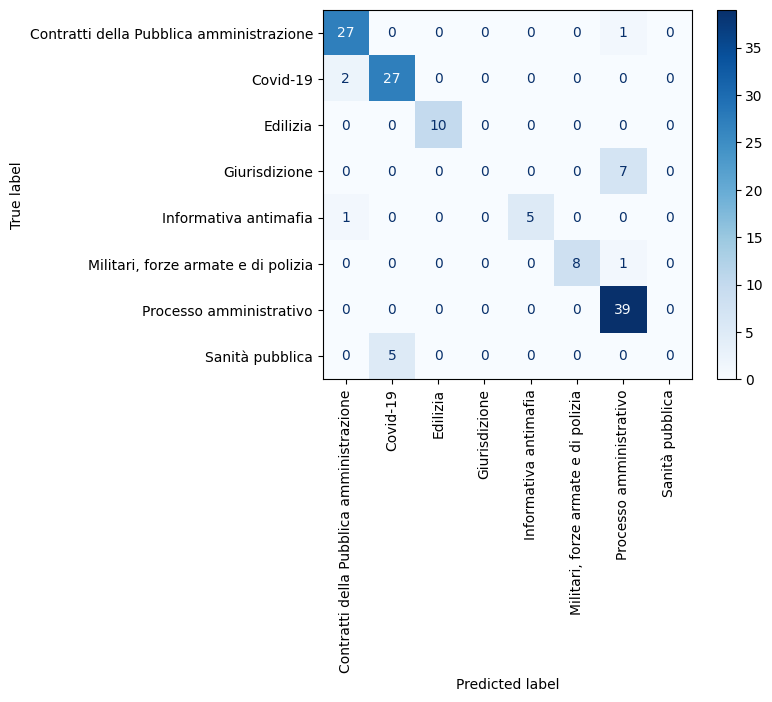

In [ ]:
y_test = test_dataset["label"]
y_pred = np.argmax(output_predictions.predictions, axis=1)

# Convert numerical labels to string labels using your mapping
y_test_str = [int_to_str[label] for label in y_test]
y_pred_str = [int_to_str[label] for label in y_pred]

# Get the sorted list of class names for consistent ordering
class_names = sorted(int_to_str.values())

report = classification_report(y_test_str, y_pred_str)
cm = ConfusionMatrixDisplay.from_predictions(
    y_test_str,
    y_pred_str,
    display_labels=class_names,
    xticks_rotation='vertical',
    cmap='Blues'
)

print("Classification Report:")
print(report)
print()

print("Confusion Matrix:")
cm.figure_.show()  # This will display the confusion matrix

Since we are happy with the result, we log into HuggingFace and push the model to the hub. Here's the link to the [uploaded model](https://huggingface.co/mpapucci/BertForItaCaseholdClassification).

In [ ]:
model_finetuned_name = "mpapucci/BertForItaCaseholdClassification"

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
trainer.model.push_to_hub(model_finetuned_name)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/mpapucci/BertForItaCaseholdClassification/commit/02f5e4a283cedff176a9451a3bb6643b2b4c8e8a', commit_message='Upload BertForSequenceClassification', commit_description='', oid='02f5e4a283cedff176a9451a3bb6643b2b4c8e8a', pr_url=None, repo_url=RepoUrl('https://huggingface.co/mpapucci/BertForItaCaseholdClassification', endpoint='https://huggingface.co', repo_type='model', repo_id='mpapucci/BertForItaCaseholdClassification'), pr_revision=None, pr_num=None)